In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score as r2
from scipy import stats
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold, GridSearchCV
%matplotlib inline

### Функция оценки

In [2]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
   
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [3]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

In [4]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail(n=3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [5]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail(n=3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [6]:
data = pd.concat([train_df, test_df], axis=0)
data = data.reset_index(drop=True)
data.shape

x_train = data[data["Price"].notnull()]
x_test = data[data["Price"].isnull()]

In [7]:
data.keys()

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [8]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [9]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

In [10]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [11]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [12]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [13]:
train_df.loc[train_df['Rooms'].isin([0,10,19])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [14]:
#wrong_square = data[(data['Square']<data['LifeSquare']) | data['LifeSquare'].isnull()]
wrong_square = data[(data['Square']<data['LifeSquare'])]
wrong_square

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,B,B,15,2787,2,520.0,0,7,B,435462.048070
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,199215.452229
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,B,B,53,13670,4,NaN,1,11,B,309688.592681
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,131797.472284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14927,14686,1,3.0,77.229885,79.958685,1.0,18,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,NaN
14951,3711,94,1.0,41.281057,42.392594,10.0,13,13.0,2014,0.282798,B,B,33,8667,2,NaN,0,6,B,NaN
14962,5820,94,1.0,33.680382,34.198977,1.0,10,9.0,1972,0.127376,B,B,43,8429,3,NaN,3,9,B,NaN
14969,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B,NaN


## KitchenSquare

In [15]:
data['KitchenSquare'].value_counts().head(n=20)

1.0     3651
8.0     1912
5.0     1781
6.0     1633
10.0    1633
9.0     1260
0.0     1032
7.0      906
12.0     381
11.0     340
13.0     100
14.0      71
4.0       60
15.0      48
3.0       33
16.0      29
17.0      17
20.0      16
19.0      13
18.0       9
Name: KitchenSquare, dtype: int64

In [16]:
data[data['KitchenSquare']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
39,9371,23,2.0,60.503248,NaN,0.0,16,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14969,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B,NaN
14973,1804,27,1.0,38.916778,NaN,0.0,11,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,NaN
14974,5296,52,1.0,44.442218,44.634608,0.0,5,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,NaN
14976,4723,95,1.0,45.542940,NaN,0.0,6,0.0,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B,NaN


In [17]:
data[data['KitchenSquare']>data['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,NaN,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,NaN,0,0,B,99079.960518
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275
11964,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B,NaN
12424,10662,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,B,B,31,6119,4,NaN,1,2,B,NaN
13863,3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,B,B,10,2277,2,1547.0,0,0,B,NaN
14555,12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B,NaN


In [18]:
data.loc[data['KitchenSquare']<1.0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
39,9371,23,2.0,60.503248,NaN,0.0,16,0.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,229778.057902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14969,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B,NaN
14973,1804,27,1.0,38.916778,NaN,0.0,11,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,NaN
14974,5296,52,1.0,44.442218,44.634608,0.0,5,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,NaN
14976,4723,95,1.0,45.542940,NaN,0.0,6,0.0,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B,NaN


<AxesSubplot:>

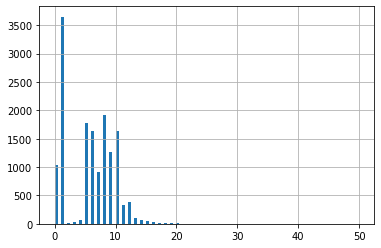

In [19]:
data['KitchenSquare'].hist(bins=100,range=[0,50])

In [20]:
data['KitchenSquare'].describe()

count    15000.000000
mean         6.174467
std         24.016979
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [21]:
data.loc[(data['KitchenSquare']>1) & (data['KitchenSquare']<600), 'KitchenSquare'].describe()

count    10314.000000
mean         8.179368
std          4.494609
min          2.000000
25%          6.000000
50%          8.000000
75%         10.000000
max        123.000000
Name: KitchenSquare, dtype: float64

In [22]:
data.loc[(data['KitchenSquare']<=1), 'KitchenSquare'].describe()

count    4683.000000
mean        0.779628
std         0.414541
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: KitchenSquare, dtype: float64

In [23]:
data[(data['KitchenSquare']<=1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
12,6452,13,2.0,54.522805,31.759753,1.0,8,12.0,1999,0.090799,B,B,74,19083,2,NaN,5,15,B,229220.372609
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14982,12920,23,1.0,39.610426,38.187571,1.0,6,18.0,2013,0.034656,B,B,0,168,0,NaN,0,0,B,NaN
14985,11732,1,1.0,46.597283,NaN,1.0,17,24.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,NaN
14987,5361,53,3.0,80.102103,NaN,1.0,13,22.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,NaN
14998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,NaN


In [24]:
data[(data['KitchenSquare']<=1) & (data['LifeSquare'].notnull())]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
12,6452,13,2.0,54.522805,31.759753,1.0,8,12.0,1999,0.090799,B,B,74,19083,2,NaN,5,15,B,229220.372609
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,B,B,0,168,0,NaN,0,0,B,95338.198549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14968,15181,27,4.0,104.664209,66.903563,1.0,4,1.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,NaN
14969,4821,74,2.0,82.542507,82.585069,0.0,4,17.0,2015,0.309479,B,B,35,7715,4,990.0,0,6,B,NaN
14972,16064,30,1.0,38.376234,37.003311,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,NaN
14974,5296,52,1.0,44.442218,44.634608,0.0,5,17.0,1977,0.371149,B,B,34,7065,1,750.0,2,5,B,NaN


In [25]:
data[(data['KitchenSquare']>1) & (data['LifeSquare'].notnull())]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,14562,113,2.0,46.627882,27.058739,5.0,6,5.0,1969,0.307467,B,A,30,5048,9,325.0,2,5,B,NaN
14994,6836,39,2.0,45.131282,30.780551,6.0,2,5.0,1965,0.428826,B,B,25,5011,8,730.0,0,2,B,NaN
14995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B,NaN
14996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B,NaN


## LifeSquare

In [26]:
data[(data['LifeSquare'].isnull())]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
21,11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
25,5073,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,244145.827069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14976,4723,95,1.0,45.542940,NaN,0.0,6,0.0,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B,NaN
14985,11732,1,1.0,46.597283,NaN,1.0,17,24.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,NaN
14987,5361,53,3.0,80.102103,NaN,1.0,13,22.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,NaN
14998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,NaN


In [27]:
data[(data['LifeSquare'].isnull()) & (data['KitchenSquare']<=1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
21,11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3.0,118.907612,NaN,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
25,5073,74,2.0,82.667915,NaN,1.0,16,17.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,244145.827069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14976,4723,95,1.0,45.542940,NaN,0.0,6,0.0,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B,NaN
14985,11732,1,1.0,46.597283,NaN,1.0,17,24.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,NaN
14987,5361,53,3.0,80.102103,NaN,1.0,13,22.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B,NaN
14998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,NaN


In [28]:
data[(data['LifeSquare'].isnull()) & (data['KitchenSquare']>1)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
152,14141,23,2.0,57.699619,NaN,10.0,2,1.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,114168.532703
334,15979,27,1.0,47.426349,NaN,10.0,9,1.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,148330.648623
416,10325,1,1.0,37.662346,NaN,10.0,8,17.0,2018,0.007122,B,B,1,264,0,NaN,0,1,B,119627.821578
448,8119,27,3.0,56.579350,NaN,12.0,24,27.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,205998.692174
461,16538,17,3.0,124.601250,NaN,10.0,18,20.0,2016,0.093443,B,B,23,4635,5,3300.0,2,4,B,497573.388939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14645,5252,23,1.0,36.314375,NaN,6.0,12,12.0,2015,0.034656,B,B,0,168,0,NaN,0,0,B,NaN
14671,2896,23,2.0,53.236324,NaN,8.0,6,17.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,NaN
14752,7432,23,2.0,53.830143,NaN,10.0,1,5.0,1977,0.034656,B,B,0,168,0,NaN,0,0,B,NaN
14845,8165,62,3.0,139.101523,NaN,20.0,4,3.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,NaN


<AxesSubplot:>

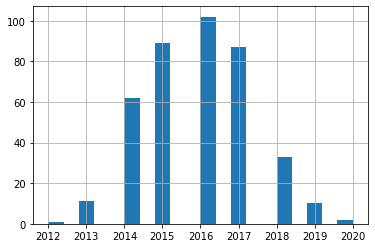

In [29]:
data.loc[(data['LifeSquare'].isnull()) & (data['HouseYear']>1977), 'HouseYear'].hist(bins=20)

<AxesSubplot:>

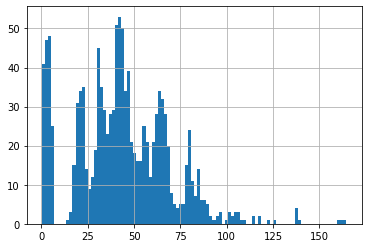

In [30]:
data.loc[data['HouseYear']==1977, 'LifeSquare'].hist(bins=100)

In [31]:
data[data['LifeSquare']<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
95,4280,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,B,B,53,13670,4,NaN,1,11,B,286564.441972
134,12613,6,2.0,65.496674,5.589324,1.0,5,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,180727.643541
158,16779,27,3.0,51.991064,4.896202,1.0,22,25.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,174687.566186
160,3522,6,1.0,66.419841,3.987101,1.0,2,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,193361.229815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14818,8963,27,3.0,79.114387,3.329216,1.0,3,22.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,NaN
14846,5002,1,3.0,82.624843,4.379317,1.0,5,17.0,2016,0.007122,B,B,1,264,0,NaN,0,1,B,NaN
14863,4611,27,2.0,76.709543,2.989508,1.0,13,12.0,2016,0.072158,B,B,2,629,1,NaN,0,0,A,NaN
14902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B,NaN


## Кластеризация по площади

In [32]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=100)

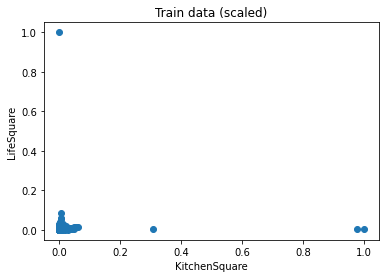

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(data[['KitchenSquare', 'LifeSquare']]), 
                            columns=['KitchenSquare', 'LifeSquare'])

plt.scatter(train_scaled['KitchenSquare'], train_scaled['LifeSquare'])

plt.xlabel('KitchenSquare')
plt.ylabel('LifeSquare')

plt.title('Train data (scaled)')

plt.show()

## Squares together

### incorrect

In [34]:
data[['Rooms','Square','LifeSquare', 'KitchenSquare']].head()

,Rooms,Square,LifeSquare,KitchenSquare
0,2.0,47.981561,29.442751,6.0
1,3.0,65.683640,40.049543,8.0
2,2.0,44.947953,29.197612,0.0
3,2.0,53.352981,52.731512,9.0
4,1.0,39.649192,23.776169,7.0


In [35]:
data['Rooms'].value_counts()

2.0     5910
1.0     5474
3.0     3334
4.0      240
5.0       25
0.0       10
6.0        3
10.0       2
19.0       1
17.0       1
Name: Rooms, dtype: int64

In [36]:
q = [np.percentile(data['Rooms'], q=x) for x in np.arange(0,100,.1)]
q



[0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [37]:
len(np.arange(0, 100, 0.1))

1000

Text(0, 0.5, 'Rooms')

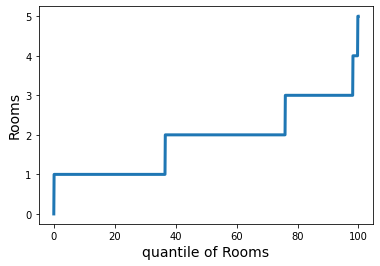

In [38]:

plt.plot(np.arange(0, 100, 0.1), q, linewidth=3)
plt.xlabel("quantile of Rooms", size=14)
plt.ylabel("Rooms", size=14)

In [39]:
data.loc[(data['Rooms']<np.percentile(data['Rooms'], 99.9)) & (data['Rooms']!=0), 'Rooms'].value_counts()

2.0    5910
1.0    5474
3.0    3334
4.0     240
Name: Rooms, dtype: int64

In [40]:
data_by_rooms_train = data[(data['Rooms']<np.percentile(data['Rooms'], 99.9)) & (data['Rooms']!=0) & 
                     (data['LifeSquare'].notnull())]
data_by_rooms_train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,14562,113,2.0,46.627882,27.058739,5.0,6,5.0,1969,0.307467,B,A,30,5048,9,325.0,2,5,B,NaN
14994,6836,39,2.0,45.131282,30.780551,6.0,2,5.0,1965,0.428826,B,B,25,5011,8,730.0,0,2,B,NaN
14995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B,NaN
14996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B,NaN


### Линейная регрессия для получения недостающих значений площади

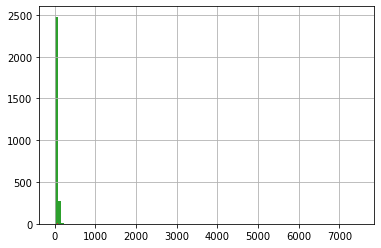

In [41]:
#fig, ax = plt.subplots(nrows=2, ncols=2)
#fig.set_size_inches(8.5, 3.5)
#fig.subplots_adjust(wspace=0.3)

from sklearn.linear_model import LinearRegression

lrs = []
i=0
for room in np.unique(data_by_rooms_train['Rooms']):
    x=(data.loc[(data['Rooms']==room) & (data['LifeSquare'].notnull()), 'Square'])
    y=(data.loc[(data['Rooms']==room) & (data['LifeSquare'].notnull()), 'LifeSquare'])
    y.hist(bins=100)
    lrs.append(LinearRegression())
    lrs[i].fit(pd.DataFrame(x), y)

    #print(np.sort(x))
    #ax[i].plot(x.hist(), y)
    i += 1

In [42]:
lrs

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]

In [43]:
i=0
for room in np.unique(data_by_rooms_train['Rooms']):
    mask = (data['Rooms']==room) & (data['LifeSquare'].isnull())
    x_test=data.loc[mask, 'Square']
    x_test_idx = data[mask].index
    print (f"indexes: {x_test_idx}")
    print (f"before LifeSquare {data.loc[mask, 'LifeSquare']}")
    
    #= np.array(lrs[i].predict(x_test))
    # x_test=(data.loc[(data['Rooms']==room) & (data['LifeSquare'].isnull()), 'Square'])
    #y_test=(data.loc[(data['Rooms']==room) & (data['LifeSquare'].isnull()), 'LifeSquare'])
    pred = pd.DataFrame(x_test)
    print(f"len_pred = {len(pred['Square'])}")
    print(f"o: {pred}")
    y_test = pd.DataFrame(lrs[i].predict(pd.DataFrame(x_test)))
    print(f"len_y = {len(y_test)}: {y_test}")
    pred.insert(1, "LifeSquare", np.array(y_test))
    print(f'room: {room}, pred: {pred}')
    data.loc[np.array(x_test_idx), 'LifeSquare'] = np.array(y_test)
    
    #print(f'room: {room}, xtest: {x_test}')
    
    #pred.hist(bins=100)
    #print(pred)

    #print(np.sort(x))
    #ax[i].plot(x.hist(), y)
    i += 1

indexes: Int64Index([   36,    54,    63,    65,    98,   143,   173,   225,   226,
              229,
            ...
            14892, 14900, 14910, 14922, 14943, 14945, 14956, 14973, 14976,
            14985],
           dtype='int64', length=1285)
before LifeSquare 36      NaN
54      NaN
63      NaN
65      NaN
98      NaN
         ..
14945   NaN
14956   NaN
14973   NaN
14976   NaN
14985   NaN
Name: LifeSquare, Length: 1285, dtype: float64
len_pred = 1285
o:           Square
36     41.118766
54     42.414176
63     42.505532
65     41.194188
98     41.845698
...          ...
14945  41.225107
14956  38.756507
14973  38.916778
14976  45.542940
14985  46.597283

[1285 rows x 1 columns]
len_y = 1285:               0
0     25.604168
1     26.629100
2     26.701381
3     25.663843
4     26.179318
...         ...
1280  25.688305
1281  23.735142
1282  23.861949
1283  29.104586
1284  29.938786

[1285 rows x 1 columns]
room: 1.0, pred:           Square  LifeSquare
36     41.118766   25.604

In [44]:
data.loc[np.array(x_test_idx), 'LifeSquare'] = np.array(y_test)
print(f"indices: {x_test_idx}")

indices: Int64Index([ 1038,  1649,  2109,  2520,  4880,  4916,  6201,  8573,  8941,
            10072, 11001, 11350, 11822, 14074, 14287],
           dtype='int64')


In [45]:
data[data['LifeSquare'].isnull()]


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3271,6358,27,5.0,42.003293,NaN,0.0,5,12.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,112693.641769
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
9432,338,46,5.0,147.709302,NaN,0.0,6,0.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,352168.955975
12071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,NaN,0,0,B,NaN


In [46]:
data[data['LifeSquare'].isnull()].index

Int64Index([2269, 3271, 3911, 4366, 9432, 12071], dtype='int64')

In [47]:
data.loc[[2269, 3271, 3911], 'LifeSquare'] = np.array(lrs[0].predict(pd.DataFrame(data.loc[[2269, 3271, 3911], 'Square'])))

In [48]:
data.loc[[4366], 'LifeSquare'] = np.array(lrs[2].predict(pd.DataFrame(data.loc[[4366], 'Square'])))

In [49]:
data.loc[[9432, 12071], 'LifeSquare'] = np.array(lrs[3].predict(pd.DataFrame(data.loc[[9432, 12071], 'Square'])))

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             15000 non-null  int64  
 1   DistrictId     15000 non-null  int64  
 2   Rooms          15000 non-null  float64
 3   Square         15000 non-null  float64
 4   LifeSquare     15000 non-null  float64
 5   KitchenSquare  15000 non-null  float64
 6   Floor          15000 non-null  int64  
 7   HouseFloor     15000 non-null  float64
 8   HouseYear      15000 non-null  int64  
 9   Ecology_1      15000 non-null  float64
 10  Ecology_2      15000 non-null  object 
 11  Ecology_3      15000 non-null  object 
 12  Social_1       15000 non-null  int64  
 13  Social_2       15000 non-null  int64  
 14  Social_3       15000 non-null  int64  
 15  Healthcare_1   7825 non-null   float64
 16  Helthcare_2    15000 non-null  int64  
 17  Shops_1        15000 non-null  int64  
 18  Shops_

## Healthcare part

<AxesSubplot:>

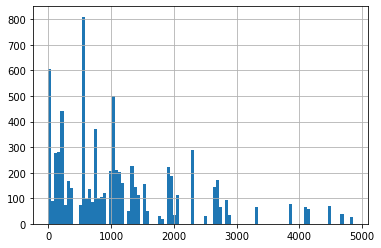

In [51]:
data.loc[data['Healthcare_1'].notnull(), 'Healthcare_1'].hist(bins=100)

In [52]:
data.loc[data['Healthcare_1'].notnull(), 'Healthcare_1'].value_counts()

540.0     768
30.0      511
1046.0    365
750.0     235
229.0     220
         ... 
1815.0     19
32.0       19
920.0      19
35.0        4
0.0         2
Name: Healthcare_1, Length: 79, dtype: int64

In [53]:
data_num_features = data.select_dtypes(include='float64')

In [54]:
#data_num_features.hist(figsize=(16,16), bins=100, grid=False);

In [55]:
data.loc[data['DistrictId']==10, 'Healthcare_1']

90      NaN
666     NaN
873     NaN
895     NaN
1054    NaN
         ..
12875   NaN
12949   NaN
13538   NaN
13985   NaN
14675   NaN
Name: Healthcare_1, Length: 72, dtype: float64

In [56]:
start_median = data['Healthcare_1'].median()

districts_median = data.groupby(['DistrictId'])['Healthcare_1'].median()
for district in np.unique(data['DistrictId']):
    #print(district, districts_median[district])
    data.loc[(data['Healthcare_1'].isnull()) & (data['DistrictId']==district), 'Healthcare_1'] = districts_median[district]

data.loc[data['Healthcare_1'].isnull(), 'Healthcare_1'] = start_median
#data.loc[data['Healthcare_1'].isnull(), 'Healthcare_1'] = data['Healthcare_1'].median()

#data.loc[(data['Healthcare_1'].isnull()) & ()]
#for district in data[['DistrictId']]:
#    data.loc[(data['Healthcare_1'].isnull()) & (data['DistrictId']==district), 'Healthcare_1'] = data.loc[data['DistrictId'], 'Healthcare_1'].median()


<AxesSubplot:>

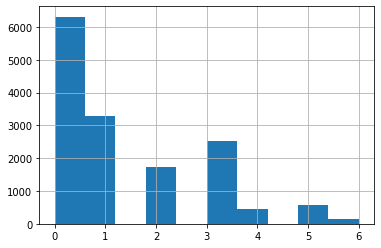

In [57]:
data['Helthcare_2'].hist()

In [58]:
gp = data.groupby(["DistrictId"])["Helthcare_2"].sum()
data["Healthcare_2_sum"] = data["DistrictId"].map(gp.to_dict())

data["Med_per_district"] = np.where(data["DistrictId"], data["Healthcare_2_sum"]/data["DistrictId"].astype('float64'), 0)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                15000 non-null  int64  
 1   DistrictId        15000 non-null  int64  
 2   Rooms             15000 non-null  float64
 3   Square            15000 non-null  float64
 4   LifeSquare        15000 non-null  float64
 5   KitchenSquare     15000 non-null  float64
 6   Floor             15000 non-null  int64  
 7   HouseFloor        15000 non-null  float64
 8   HouseYear         15000 non-null  int64  
 9   Ecology_1         15000 non-null  float64
 10  Ecology_2         15000 non-null  object 
 11  Ecology_3         15000 non-null  object 
 12  Social_1          15000 non-null  int64  
 13  Social_2          15000 non-null  int64  
 14  Social_3          15000 non-null  int64  
 15  Healthcare_1      15000 non-null  float64
 16  Helthcare_2       15000 non-null  int64 

-------

## Новые признаки

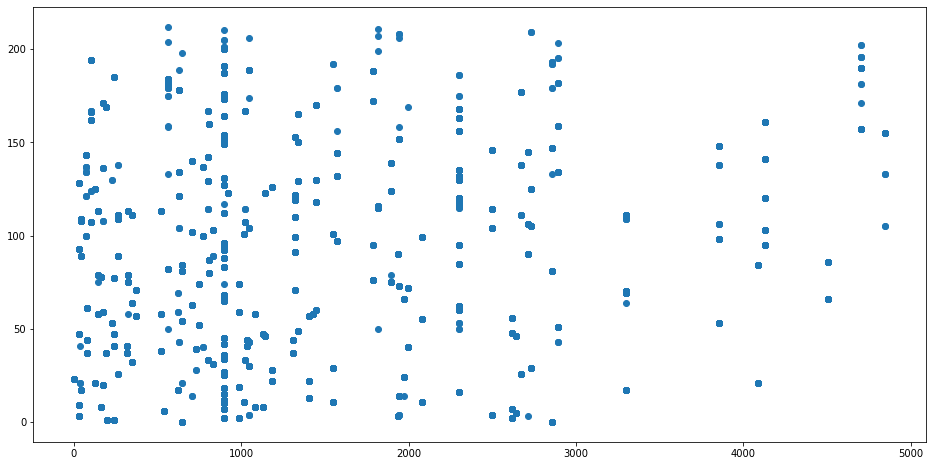

In [60]:
plt.figure(figsize=(16,8))
plt.scatter(data[['Healthcare_1']], data[['DistrictId']])

### Дополнительные параметры из лекции

In [61]:
gp = data.groupby(["Rooms"])["Square"].mean()
data["Mean_Square_by_rooms"] = data["Rooms"].map(gp.to_dict())

data["diff_square_and_mean_square_by_rooms"] = data["Square"] - data["Mean_Square_by_rooms"]
data["ratio_square_and_mean_square_by_rooms"] = data["Square"] / data["Mean_Square_by_rooms"] - 1

In [62]:
data["bigger_then_mean"] = np.where(
    data["diff_square_and_mean_square_by_rooms"] > 0, 1, 0)
data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Healthcare_2_sum,Med_per_district,Mean_Square_by_rooms,diff_square_and_mean_square_by_rooms,ratio_square_and_mean_square_by_rooms,bigger_then_mean
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,B,184966.930730,0,0.000000,56.754185,-8.772623,-0.154572,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,B,300009.450063,130,3.170732,77.001488,-11.317848,-0.146982,0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,1,3,B,220925.908524,315,5.943396,56.754185,-11.806232,-0.208024,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,B,175616.227217,131,2.258621,56.754185,-3.401203,-0.059929,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,B,150226.531644,341,3.444444,41.200432,-1.551240,-0.037651,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,...,1,1,B,NaN,265,24.090909,77.001488,-9.867577,-0.128148,0
14996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,...,0,1,B,NaN,239,239.000000,41.200432,-1.001960,-0.024319,0
14997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,...,5,15,B,NaN,500,41.666667,77.001488,0.840690,0.010918,1
14998,4780,62,2.0,81.305222,57.872892,0.0,4,0.0,1977,0.072158,...,0,0,A,NaN,55,0.887097,56.754185,24.551037,0.432585,1


In [63]:
data['Ecology_2_bin'] = data['Ecology_2'].replace({'A':1, 'B':0}).astype('float64')
data['Ecology_3_bin'] = data['Ecology_3'].replace({'A':1, 'B':0}).astype('float64')
data['Shops_2_bin'] = data['Shops_2'].replace({'A':1, 'B':0}).astype('float64')

In [64]:
district_size = data['DistrictId'].value_counts().reset_index()\
               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head(n=30)

,DistrictId,DistrictSize
0,27,1242
1,1,996
2,23,829
3,6,768
4,9,426
5,62,369
6,30,343
7,58,270
8,53,265
9,21,235


In [65]:
data = data.merge(district_size, on='DistrictId', how='left')
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_2_sum,Med_per_district,Mean_Square_by_rooms,diff_square_and_mean_square_by_rooms,ratio_square_and_mean_square_by_rooms,bigger_then_mean,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,0.000000,56.754185,-8.772623,-0.154572,0,0.0,0.0,0.0,36
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,130,3.170732,77.001488,-11.317848,-0.146982,0,0.0,0.0,0.0,131
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,315,5.943396,56.754185,-11.806232,-0.208024,0,0.0,0.0,0.0,265
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,131,2.258621,56.754185,-3.401203,-0.059929,0,0.0,0.0,0.0,270
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,341,3.444444,41.200432,-1.551240,-0.037651,0,0.0,0.0,0.0,139


In [66]:
data['IsDistrictLarge'] = (data['DistrictSize'] > 100).astype(int)

In [67]:
med_price_by_district = data.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.loc[med_price_by_district['MedPriceByDistrict'].isnull(), 'MedPriceByDistrict'] = med_price_by_district['MedPriceByDistrict'].median()

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142799.434052
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,0,4.0,247964.981768
4,1,1.0,146735.671740


In [68]:
data = data.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Mean_Square_by_rooms,diff_square_and_mean_square_by_rooms,ratio_square_and_mean_square_by_rooms,bigger_then_mean,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,56.754185,-8.772623,-0.154572,0,0.0,0.0,0.0,36,0,207786.135836
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,77.001488,-11.317848,-0.146982,0,0.0,0.0,0.0,131,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,56.754185,-11.806232,-0.208024,0,0.0,0.0,0.0,265,1,263206.223152
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,56.754185,-3.401203,-0.059929,0,0.0,0.0,0.0,270,1,166809.665642
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,41.200432,-1.551240,-0.037651,0,0.0,0.0,0.0,139,1,158539.052715


In [69]:
data['DistrictId'] = data['DistrictId'].astype('float64')

In [70]:
data.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Id                                     15000 non-null  int64  
 1   DistrictId                             15000 non-null  float64
 2   Rooms                                  15000 non-null  float64
 3   Square                                 15000 non-null  float64
 4   LifeSquare                             15000 non-null  float64
 5   KitchenSquare                          15000 non-null  float64
 6   Floor                                  15000 non-null  int64  
 7   HouseFloor                             15000 non-null  float64
 8   HouseYear                              15000 non-null  int64  
 9   Ecology_1                              15000 non-null  float64
 10  Ecology_2                              15000 non-null  object 
 11  Ec

In [71]:
data["Eco2_Eco3"] = data.Ecology_2 + data.Ecology_3
x_train.groupby(["Floor"])["Price"].mean()

Floor
1     181197.129047
2     200054.515039
3     197058.565017
4     206755.158571
5     208642.097899
6     213620.817491
7     219149.530324
8     217291.383083
9     218588.232587
10    212030.108560
11    213094.735844
12    211672.926703
13    215104.664305
14    231031.896587
15    234276.528574
16    222327.410321
17    219896.414764
18    230055.477403
19    229093.752512
20    244087.213465
21    243138.009099
22    289708.585988
23    277347.739049
24    262331.096642
25    270813.232998
26    313255.149648
27    238152.827407
28    310932.492847
31    117647.461002
32    245640.188762
33    389554.063540
37    269113.584248
42    411691.504766
Name: Price, dtype: float64

In [72]:
data[(data['Price'].notnull()) & (data['Eco2_Eco3']=='AB')][['Eco2_Eco3', 'Price']].describe()

,Price
count,97.000000
mean,193139.717006
std,60567.319120
min,108232.647619
25%,149725.710441
50%,182516.558181
75%,208851.457391
max,480940.075839


In [73]:
data[(data['Price'].notnull()) & (data['Eco2_Eco3']=='BA')][['Eco2_Eco3', 'Price']].describe()

,Price
count,275.000000
mean,243179.560704
std,99244.291969
min,84577.918669
25%,177959.948420
50%,211889.942902
75%,281618.313028
max,624549.354546


In [74]:
data[(data['Price'].notnull()) & (data['Eco2_Eco3']=='BB')][['Eco2_Eco3', 'Price']].describe()

,Price
count,9628.000000
mean,213520.943316
std,92804.777393
min,59174.778028
25%,152847.259365
50%,191935.904272
75%,248754.385888
max,633233.466570


In [75]:
gp1 = data.Ecology_2 + data.Ecology_3
gp1.value_counts().to_dict()

{'BB': 14431, 'BA': 424, 'AB': 145}

In [76]:

gp1.map(gp1.value_counts().to_dict())

0        14431
1        14431
2        14431
3        14431
4        14431
         ...  
14995    14431
14996    14431
14997    14431
14998    14431
14999    14431
Length: 15000, dtype: int64

## Shops part

In [77]:
data['Shops_2'].value_counts()

B    13763
A     1237
Name: Shops_2, dtype: int64

In [78]:
data.loc[(data['Price'].notnull()) & (data['DistrictId']==27) & (data['Shops_2']=='A'), ['DistrictId', 'Shops_1', 'Shops_2', 'Price']]

,DistrictId,Shops_1,Shops_2,Price
14,27.0,0,A,140647.565937
26,27.0,0,A,337299.867936
69,27.0,0,A,228584.001072
70,27.0,0,A,167023.973143
115,27.0,0,A,213798.185151
...,...,...,...,...
9944,27.0,0,A,211810.600728
9954,27.0,0,A,236647.781363
9964,27.0,0,A,145025.095667
9975,27.0,0,A,190325.071232


In [79]:
data.loc[(data['Price'].notnull()) & (data['DistrictId']==27) & (data['Shops_2']=='B'), ['Shops_1']].value_counts()

Shops_1
0          363
1          172
4           50
dtype: int64

In [80]:
data.loc[(data['Price'].notnull()) & (data['DistrictId']==27) & (data['Shops_2']=='A'), ['Shops_1']].value_counts()

Shops_1
0          266
dtype: int64

In [81]:
data.loc[(data['Price'].notnull()) & (data['Shops_2']=='A'), ['DistrictId', 'Shops_1', 'Shops_2', 'Price']]

,DistrictId,Shops_1,Shops_2,Price
13,57.0,4,A,252481.908323
14,27.0,0,A,140647.565937
18,57.0,4,A,183743.230464
26,27.0,0,A,337299.867936
50,170.0,7,A,172795.867077
...,...,...,...,...
9964,27.0,0,A,145025.095667
9971,67.0,6,A,228845.682509
9975,27.0,0,A,190325.071232
9996,18.0,5,A,189050.289571


In [82]:
data['Shops_1'].value_counts()

0     3466
5     1993
1     1976
2     1448
4     1254
3     1079
6      731
11     625
9      476
7      442
23     365
8      358
10     332
15     265
16     122
19      68
Name: Shops_1, dtype: int64

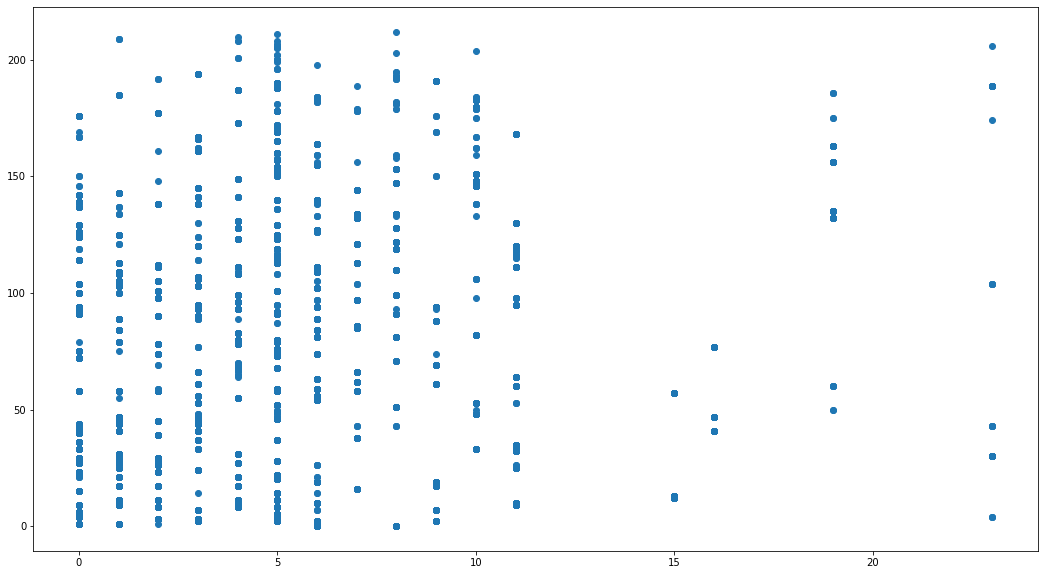

In [83]:
plt.figure(figsize=(18,10))
data_shops_a = data[data['Shops_2']=='B']
plt.scatter(data_shops_a['Shops_1'], data_shops_a['DistrictId'])

Shops_1
0     AxesSubplot(0.125,0.125;0.775x0.755)
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
6     AxesSubplot(0.125,0.125;0.775x0.755)
7     AxesSubplot(0.125,0.125;0.775x0.755)
8     AxesSubplot(0.125,0.125;0.775x0.755)
9     AxesSubplot(0.125,0.125;0.775x0.755)
10    AxesSubplot(0.125,0.125;0.775x0.755)
11    AxesSubplot(0.125,0.125;0.775x0.755)
15    AxesSubplot(0.125,0.125;0.775x0.755)
16    AxesSubplot(0.125,0.125;0.775x0.755)
19    AxesSubplot(0.125,0.125;0.775x0.755)
23    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Price, dtype: object

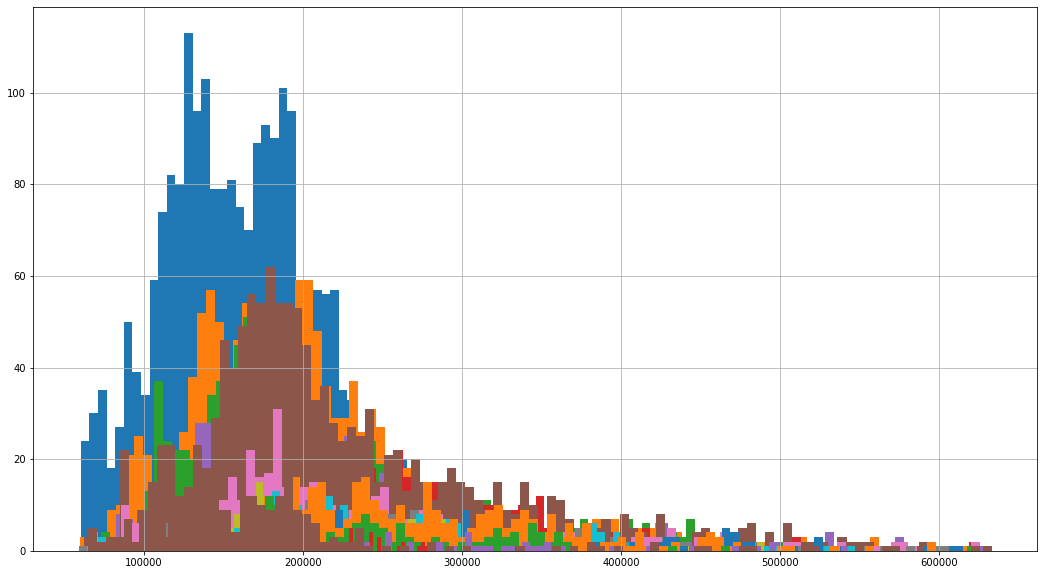

In [84]:
data.groupby('Shops_1')['Price'].hist(bins=100, figsize=(18,10))

<AxesSubplot:>

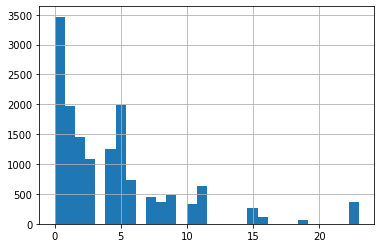

In [85]:
data['Shops_1'].hist(bins=30)

In [86]:
#shops = data.copy()


In [87]:
for shop in np.unique(data['Shops_1']):
    print(shop)
    data[f'Shop_{shop}'] = np.where(data['Shops_1']==shop, 1, 0).astype('float64')

0
1
2
3
4
5
6
7
8
9
10
11
15
16
19
23


In [88]:
gp = data.groupby(["DistrictId"])["Shops_1"].sum()
data["Shops_sum"] = data["DistrictId"].map(gp.to_dict())

data["shops_per_district"] = np.where(data["DistrictId"], data["Shops_sum"]/data["DistrictId"], 0)
#data["district_per_shop"] = np.where(data["Shops_sum"], data["DistrictSize"]/data["Shops_sum"], 0)
#data["Shops_sum"] = data["Shops_sum"].astype('float64')

## District part

In [89]:
for district in np.unique(data['DistrictId']):
    data[f'District_{district}'] = np.where(data['DistrictId']==district, 1, 0).astype('float64')

In [90]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,District_203.0,District_204.0,District_205.0,District_206.0,District_207.0,District_208.0,District_209.0,District_210.0,District_211.0,District_212.0
0,14038,35.0,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15053,41.0,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4765,53.0,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5809,58.0,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10783,99.0,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Social

In [91]:
data['Social_1'] = data['Social_1'].astype('float64')

In [92]:
data['Social_2'] = data['Social_2'].astype('float64')

In [93]:
data['Social_3'] = data['Social_3'].astype('float64')
data['Social_3'].value_counts()

0.0      4467
1.0      2757
3.0      1676
4.0      1279
2.0       958
6.0       637
5.0       592
141.0     365
9.0       308
7.0       276
11.0      268
8.0       247
10.0      227
14.0      150
16.0      147
48.0       94
27.0       81
84.0       75
56.0       68
24.0       57
93.0       37
87.0       37
59.0       36
19.0       34
23.0       32
39.0       32
20.0       25
73.0       19
45.0       14
37.0        5
Name: Social_3, dtype: int64

<AxesSubplot:>

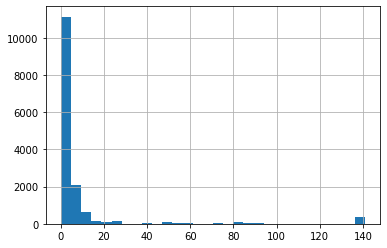

In [94]:
data['Social_3'].hist(bins=30)

## Houseyear part

In [95]:
data.loc[data['HouseYear']>2020, 'HouseYear']

1497    20052011
4189        4968
Name: HouseYear, dtype: int64

In [96]:
data.loc[data['HouseYear']==20052011, 'HouseYear'] = 2011
data.loc[data['HouseYear']==4968, 'HouseYear'] = 1968

In [97]:
data['Age'] = 2020 - data['HouseYear']

In [98]:
data['Age'] = data['Age'].astype('float64')

<AxesSubplot:>

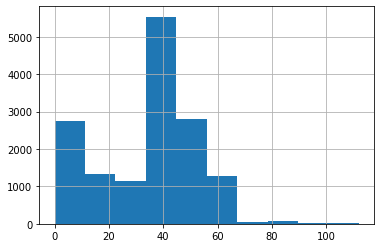

In [99]:
data['Age'].hist()

## Social part

<AxesSubplot:>

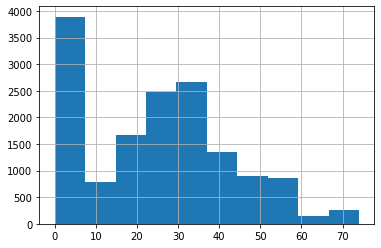

In [100]:
data['Social_1'].hist()

<AxesSubplot:>

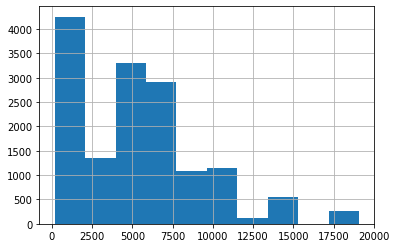

In [101]:
data['Social_2'].hist()

In [102]:
data['Social_3'].value_counts()

0.0      4467
1.0      2757
3.0      1676
4.0      1279
2.0       958
6.0       637
5.0       592
141.0     365
9.0       308
7.0       276
11.0      268
8.0       247
10.0      227
14.0      150
16.0      147
48.0       94
27.0       81
84.0       75
56.0       68
24.0       57
93.0       37
87.0       37
59.0       36
19.0       34
23.0       32
39.0       32
20.0       25
73.0       19
45.0       14
37.0        5
Name: Social_3, dtype: int64

In [103]:
gp = data.groupby(["DistrictId"])["Social_3"].sum()
data["Social_sum"] = data["DistrictId"].map(gp.to_dict())

data["soc_per_district"] = np.where(data["DistrictId"], data["Social_sum"]/data["DistrictId"].astype('float64'), 0)

## HouseFloor

<AxesSubplot:>

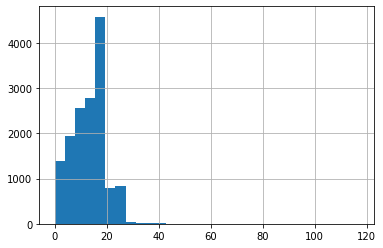

In [104]:
data['HouseFloor'].hist(bins=30)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Columns: 266 entries, Id to soc_per_district
dtypes: float64(252), int64(10), object(4)
memory usage: 30.6+ MB


## Teaching

In [106]:
feature_names = list(data.columns)
feature_names

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Healthcare_2_sum',
 'Med_per_district',
 'Mean_Square_by_rooms',
 'diff_square_and_mean_square_by_rooms',
 'ratio_square_and_mean_square_by_rooms',
 'bigger_then_mean',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict',
 'Eco2_Eco3',
 'Shop_0',
 'Shop_1',
 'Shop_2',
 'Shop_3',
 'Shop_4',
 'Shop_5',
 'Shop_6',
 'Shop_7',
 'Shop_8',
 'Shop_9',
 'Shop_10',
 'Shop_11',
 'Shop_15',
 'Shop_16',
 'Shop_19',
 'Shop_23',
 'Shops_sum',
 'shops_per_district',
 'District_0.0',
 'District_1.0',
 'District_2.0',
 'District_3.0',
 'District_4.0',
 'District_5.0',
 'District_6.0',
 'District_7.0',
 'District_8.0',
 'District_9.0',
 'District_10.0',
 'District_11.0',
 'District_12.0

In [107]:
data['DistrictId']=data['DistrictId'].astype('str')

In [108]:
reduced_x_train = data[data['Price'].notnull()].select_dtypes(include='float64').copy()
reduced_x_train

,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,...,District_206.0,District_207.0,District_208.0,District_209.0,District_210.0,District_211.0,District_212.0,Age,Social_sum,soc_per_district
0,2.0,47.981561,29.442751,6.0,9.0,0.089040,33.0,7976.0,5.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,180.0,5.142857
1,3.0,65.683640,40.049543,8.0,9.0,0.000070,46.0,10309.0,1.0,240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,313.0,7.634146
2,2.0,44.947953,29.197612,0.0,12.0,0.049637,34.0,7759.0,0.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,628.0,11.849057
3,2.0,53.352981,52.731512,9.0,17.0,0.437885,23.0,5735.0,3.0,1084.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,597.0,10.293103
4,1.0,39.649192,23.776169,7.0,12.0,0.012339,35.0,5776.0,1.0,2078.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,139.0,1.404040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,50.401785,30.476203,5.0,5.0,0.135650,46.0,7960.0,6.0,350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,330.0,10.312500
9996,1.0,41.521546,20.539216,9.0,13.0,0.000000,30.0,5562.0,0.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.000000
9997,1.0,47.939008,31.000362,1.0,16.0,0.072158,2.0,629.0,1.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,705.0,26.111111
9998,2.0,43.602562,33.840147,8.0,5.0,0.307467,30.0,5048.0,9.0,325.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,790.0,10.533333


In [109]:
#reduced_x_train.loc[reduced_x_train['Healthcare_1'].isnull(), 'Healthcare_1'] = reduced_x_train['Healthcare_1'].median()
#reduced_x_train

In [110]:
feature_names=list(reduced_x_train.columns)
feature_names.remove('Price')
feature_names

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'HouseFloor',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Med_per_district',
 'Mean_Square_by_rooms',
 'diff_square_and_mean_square_by_rooms',
 'ratio_square_and_mean_square_by_rooms',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'MedPriceByDistrict',
 'Shop_0',
 'Shop_1',
 'Shop_2',
 'Shop_3',
 'Shop_4',
 'Shop_5',
 'Shop_6',
 'Shop_7',
 'Shop_8',
 'Shop_9',
 'Shop_10',
 'Shop_11',
 'Shop_15',
 'Shop_16',
 'Shop_19',
 'Shop_23',
 'shops_per_district',
 'District_0.0',
 'District_1.0',
 'District_2.0',
 'District_3.0',
 'District_4.0',
 'District_5.0',
 'District_6.0',
 'District_7.0',
 'District_8.0',
 'District_9.0',
 'District_10.0',
 'District_11.0',
 'District_12.0',
 'District_13.0',
 'District_14.0',
 'District_15.0',
 'District_16.0',
 'District_17.0',
 'District_18.0',
 'District_19.0',
 'District_20.0',
 'District_21.0',
 'District_22.0',
 'District_23.0',
 'District_24.0',
 'District_2

In [111]:
X = reduced_x_train[feature_names].copy()
y = reduced_x_train['Price'].copy()

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [113]:
#X_train["random"] = np.random.randn(X_train.shape[0])
#X_test["random"] = np.random.randn(X_test.shape[0])

In [114]:
rf_model = RandomForestRegressor(max_depth=8, n_estimators=100, random_state=21)
rf_model.fit(X_train.fillna(-9999), y_train)

RandomForestRegressor(max_depth=8, random_state=21)

Train R2:	0.842
Test R2:	0.749


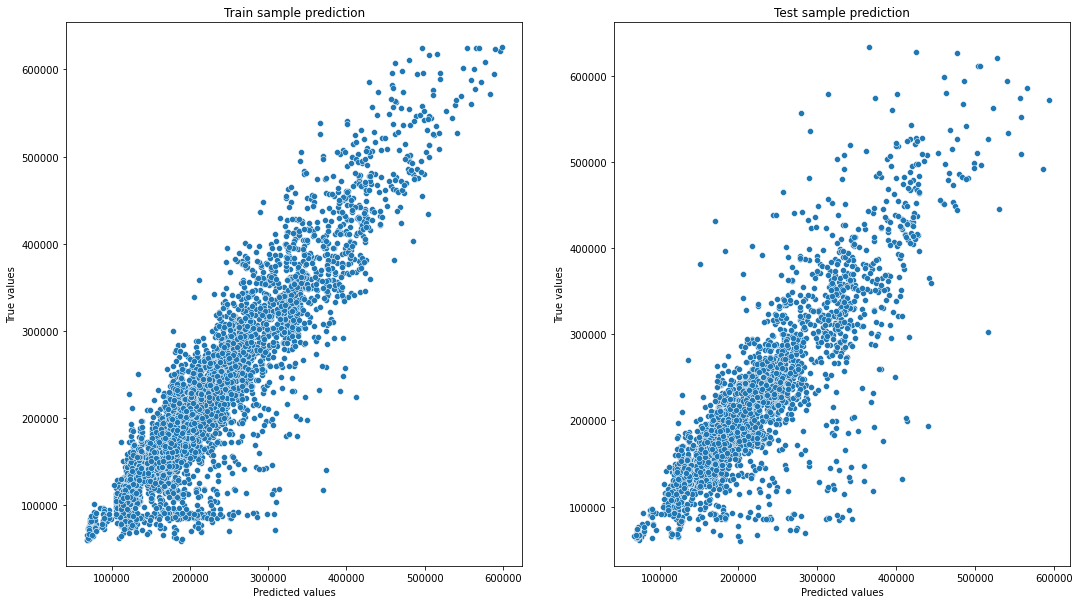

In [115]:
y_train_preds = rf_model.predict(X_train.fillna(-9999))
y_test_preds = rf_model.predict(X_test.fillna(-9999))

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [116]:
cv_score = cross_val_score(
    rf_model,
    X.fillna(-9999),
    y,
    scoring='r2',
    cv=KFold(n_splits=5, shuffle=True, random_state=1)
)
cv_score

array([0.75688744, 0.74446878, 0.73423232, 0.77376723, 0.7353866 ])

In [117]:
cv_score.mean(), cv_score.std()

(0.7489484729212534, 0.014829395452736755)

In [118]:
cv_score.mean() - cv_score.std(), cv_score.mean() + cv_score.std()

(0.7341190774685167, 0.7637778683739902)

In [119]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False).head(n=30)

,feature_name,importance
17,MedPriceByDistrict,0.715243
1,Square,0.077119
13,ratio_square_and_mean_square_by_rooms,0.050736
12,diff_square_and_mean_square_by_rooms,0.023630
3,KitchenSquare,0.013930
8,Social_3,0.013782
4,HouseFloor,0.012366
2,LifeSquare,0.011004
247,Age,0.010809
7,Social_2,0.009490


-----

## Предсказание

In [120]:
X_out = data.drop('Price',1)[feature_names]


In [121]:
X_out


,Rooms,Square,LifeSquare,KitchenSquare,HouseFloor,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,...,District_206.0,District_207.0,District_208.0,District_209.0,District_210.0,District_211.0,District_212.0,Age,Social_sum,soc_per_district
0,2.0,47.981561,29.442751,6.0,9.0,0.089040,33.0,7976.0,5.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,180.0,5.142857
1,3.0,65.683640,40.049543,8.0,9.0,0.000070,46.0,10309.0,1.0,240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,313.0,7.634146
2,2.0,44.947953,29.197612,0.0,12.0,0.049637,34.0,7759.0,0.0,229.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,628.0,11.849057
3,2.0,53.352981,52.731512,9.0,17.0,0.437885,23.0,5735.0,3.0,1084.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,597.0,10.293103
4,1.0,39.649192,23.776169,7.0,12.0,0.012339,35.0,5776.0,1.0,2078.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,139.0,1.404040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3.0,67.133911,50.809797,6.0,9.0,0.000170,36.0,5992.0,0.0,1015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.0,136.0,12.363636
14996,1.0,40.198472,21.807061,10.0,17.0,0.007122,1.0,264.0,0.0,240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,40.0,40.000000
14997,3.0,77.842178,48.282625,9.0,22.0,0.090799,74.0,19083.0,2.0,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0,200.0,16.666667
14998,2.0,81.305222,57.872892,0.0,0.0,0.072158,2.0,629.0,1.0,2300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,446.0,7.193548


In [122]:
y_out = rf_model.predict(X_out.fillna(-9999))

In [123]:
y_out

array([190856.69255897, 274267.20059667, 225592.1577711 , ...,
       325258.34115597, 192786.88136556, 171940.94968912])